In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tarfile

## Working with an archived dataset

In [2]:
filename = 'fer2013.tar.gz'
if filename.endswith( "tar.gz" ):
    tar = tarfile.open( filename, "r:gz" )
    tar.extractall( )
    tar.close( )
elif filename.endswith( "tar" ):
    tar = tarfile.open( filename, "r:" )
    tar.extractall( )
    tar.close( )

In [3]:
df = pd.read_csv( './fer2013/fer2013.csv' )
df

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [4]:
df["pixels"][0]

'70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92

In [5]:
df["emotion"].nunique( )

7

In [6]:
df["emotion"].unique( )

array([0, 2, 4, 6, 3, 5, 1], dtype=int64)

## Data preparation

In [7]:
labels = { 0 : 'anger', 1 : 'disgust', 2 : 'fear',
           3 : 'happiness', 4 : 'sadness', 5 : 'surprise',
           6 : 'neutral' }

In [8]:
len( df["pixels"][0].split( ) )

2304

In [9]:
# the images are 48x48 pixels size.

In [10]:
first_img = np.array( df["pixels"][0].split( ), dtype='int' ).reshape( 48, 48 )

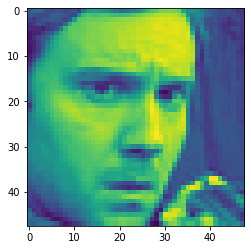

In [11]:
plt.imshow( first_img )

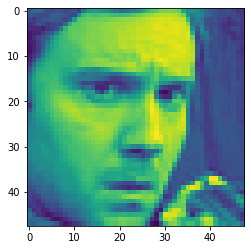

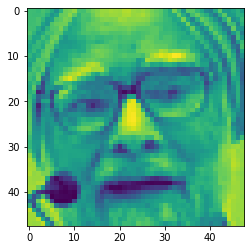

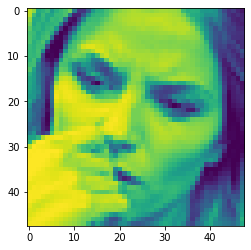

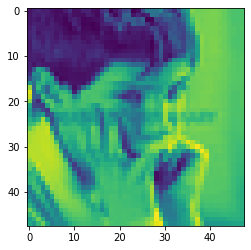

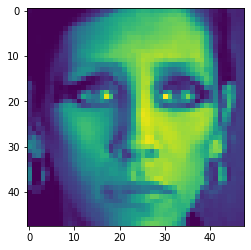

In [12]:
# observing the first 5 images of the dataset
for i in range( 5 ):
    image = np.array( df["pixels"][i].split( ), dtype='int' ).reshape( 48, 48 )
    plt.imshow( image )
    plt.show( )

In [13]:
def plot_sample( X, y, label = labels, how_many = 9 ):    
    num_rows = int( np.round( np.sqrt( how_many ) ) )
    num_cols = how_many // num_rows

    images = X[:how_many]
#     labels = y[:how_many]

    # plot images
    fig, axes = plt.subplots( num_rows, num_cols, figsize = ( 1.5 * num_cols, 2 * num_rows ) )
    for i in range( how_many ):
        ax = axes[i // num_cols, i % num_cols]
        ax.imshow( images[i] )
        ax.set_title( "{}".format( label[y[i]] ) )
    plt.tight_layout( )
    plt.show( )

In [14]:
how_many = 25
X = [np.array( df["pixels"][i].split( ), dtype='int' ).reshape( 48, 48 ) for i in range( how_many )]
y = [df["emotion"][i] for i in range( how_many )]

In [15]:
y

[0, 0, 2, 4, 6, 2, 4, 3, 3, 2, 0, 6, 6, 6, 3, 5, 3, 2, 6, 4, 4, 2, 0, 0, 3]

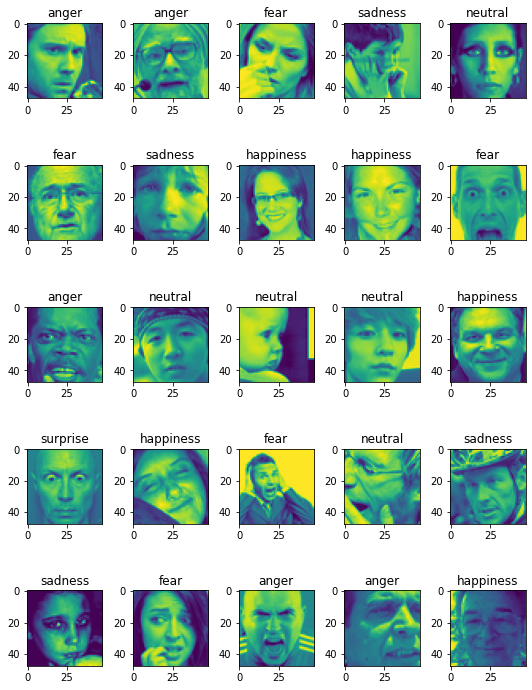

In [16]:
plot_sample( X, y, how_many=how_many )

In [17]:
img_array = df["pixels"].apply( lambda x : np.array( x.split( ), dtype='int' ).reshape( 48, 48 ) )

In [21]:
img_array.shape

(35887,)

In [22]:
img_array = np.stack( img_array, axis=0 )
img_array.shape

(35887, 48, 48)

In [24]:
y = df["emotion"].values
y

array([0, 0, 2, ..., 0, 3, 2], dtype=int64)

## Training a model

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( img_array, y, test_size=0.2, random_state=0 )

In [27]:
# normalizing the input
X_train = X_train.astype( 'float' )
X_test = X_test.astype( 'float' )

X_train /= 255
X_test /= 255

In [29]:
X_train[0]

array([[0.6627451 , 0.67058824, 0.69019608, ..., 0.6627451 , 0.65882353,
        0.6627451 ],
       [0.67843137, 0.69803922, 0.69411765, ..., 0.67058824, 0.65490196,
        0.6627451 ],
       [0.70196078, 0.70196078, 0.71372549, ..., 0.61176471, 0.6745098 ,
        0.6627451 ],
       ...,
       [0.74117647, 0.71764706, 0.65882353, ..., 0.05098039, 0.27843137,
        0.61568627],
       [0.75294118, 0.72941176, 0.65098039, ..., 0.02352941, 0.23529412,
        0.63137255],
       [0.80392157, 0.74901961, 0.65098039, ..., 0.00784314, 0.21568627,
        0.60784314]])

In [59]:
model = tf.keras.Sequential( [
    tf.keras.layers.Conv2D( filters=32, kernel_size=( 3, 3 ), input_shape=( 48, 48, 1 ),
                            activation="relu" ),
    tf.keras.layers.MaxPool2D( pool_size=( 2, 2 ), strides=2 ),
    tf.keras.layers.BatchNormalization( ),
    
    tf.keras.layers.Conv2D( filters=64, kernel_size=( 3, 3 ), activation="relu" ),
    tf.keras.layers.MaxPool2D( pool_size=( 2, 2 ), strides=2 ),
    tf.keras.layers.BatchNormalization( ),
    
    tf.keras.layers.Conv2D( filters=128, kernel_size=( 3, 3 ), activation="relu" ),
    tf.keras.layers.MaxPool2D( pool_size=( 2, 2 ), strides=2 ),
    tf.keras.layers.BatchNormalization( ),
    
    tf.keras.layers.Conv2D( filters=256, kernel_size=( 3, 3 ), activation="relu" ),
    tf.keras.layers.MaxPool2D( pool_size=( 2, 2 ), strides=2 ),
    tf.keras.layers.BatchNormalization( ),
    
    tf.keras.layers.Flatten( ),
    tf.keras.layers.Dense( units=512, activation="relu" ),
    tf.keras.layers.Dropout( 0.3 ),
    tf.keras.layers.Dense( units=256, activation="relu" ),
    tf.keras.layers.Dropout( 0.3 ),
    tf.keras.layers.Dense( units=7 )
] )

In [60]:
model.summary( )

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_27 (Bat  (None, 23, 23, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_28 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                      

In [61]:
model.compile( optimizer=tf.keras.optimizers.Adam( ),
               loss=tf.keras.losses.SparseCategoricalCrossentropy( from_logits=True ),
               metrics=["accuracy"] )

In [62]:
import os
os.mkdir( 'checkpoint' )

In [63]:
fname = "best_model.h5"
checkpoint_path = os.path.join( 'checkpoint', fname )

call_back = tf.keras.callbacks.ModelCheckpoint( filepath=checkpoint_path, 
                                                monitor='val_accuracy', 
                                                verbose=1,
                                                save_freq='epoch',
                                                save_best_only=True, 
                                                save_weights_only=False, 
                                                mode='max' )

In [64]:
model.fit( X_train, y_train, epochs=20, validation_split=0.2, callbacks=call_back )

Epoch 1/20
716/718 [============================>.] - ETA: 0s - loss: 1.6160 - accuracy: 0.3679
Epoch 1: val_accuracy improved from -inf to 0.43835, saving model to checkpoint\best_model.h5
718/718 [==============================] - 7s 8ms/step - loss: 1.6151 - accuracy: 0.3686 - val_loss: 1.4228 - val_accuracy: 0.4383
Epoch 2/20
711/718 [============================>.] - ETA: 0s - loss: 1.3516 - accuracy: 0.4813
Epoch 2: val_accuracy improved from 0.43835 to 0.51358, saving model to checkpoint\best_model.h5
718/718 [==============================] - 10s 13ms/step - loss: 1.3510 - accuracy: 0.4814 - val_loss: 1.2946 - val_accuracy: 0.5136
Epoch 3/20
710/718 [============================>.] - ETA: 0s - loss: 1.2263 - accuracy: 0.5325
Epoch 3: val_accuracy did not improve from 0.51358
718/718 [==============================] - 10s 13ms/step - loss: 1.2262 - accuracy: 0.5322 - val_loss: 1.2874 - val_accuracy: 0.5106
Epoch 4/20
714/718 [============================>.] - ETA: 0s - loss: 1.1

As it can be seen above, the model has hish training accuracy but comparatively low validation accuracy, which leads me to think that the model has **overfit**.

## Testing the final model

Actual label is happiness
1/1 [==============================] - 0s 31ms/step
Predicted label is happiness


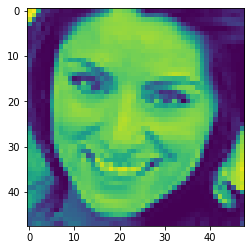

In [65]:
from IPython.display import clear_output
import time

final_model = tf.keras.models.load_model( checkpoint_path )
for i in range( 40 ):
    print( f"Actual label is { labels[y_test[i]] }" )
    predicted_class = final_model.predict( tf.expand_dims( X_test[i], 0 ) ).argmax( )
    print( f"Predicted label is { labels[predicted_class] }" )
    plt.imshow( X_test[i].reshape( 48, 48 ) )
    plt.show( )
    time.sleep( 3 )
    clear_output( wait=True )